In [56]:
%matplotlib inline 
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd 


# --- read data ---- 
df = pd.read_csv('datasets/Droughts_satelite_and_events.csv')
districts_with_droughts = pd.read_csv('datasets/districts_with_droughts_Uganda_Kenya.csv')
df.head()

,Country,District,year,month,day,date,NDVI,EVI,precipitation_per_hour_v1,precipitation_per_hour_v2,...,SPEI_6month,SPEI_7month,SPEI_8month,SPEI_9month,SPEI_10month,SPEI_11month,SPEI_12month,drought_reported,drought_news_article,drought_desinventar
0,Uganda,ABIM,2000,3,1,2000-03-01,0.270712,0.137156,0.031873,5.285528,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
1,Uganda,ABIM,2000,4,1,2000-04-01,0.368438,0.184616,0.172345,84.424662,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
2,Uganda,ABIM,2000,5,1,2000-05-01,0.624764,0.365380,0.185952,100.613865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
3,Uganda,ABIM,2000,6,1,2000-06-01,0.669868,0.416891,0.205662,91.973897,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
4,Uganda,ABIM,2000,7,1,2000-07-01,0.717746,0.458402,0.157562,67.037938,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False


# Do seasons matter? 
Let's see how many of the reported events occur within Uganda's known dry seasons

## Uganda 

dry seasons: 
* from December through February
* from June through July 

wet seasons: 
* from September through November 
* from March through May 

dry seasons shown in blue
wet seasons shown in red

 

drought events reported for Uganda
# events in wet seasons:  92
# events in dry seasons:  1199
92.87374128582493 % of all reported events occur in the dry seasons (Uganda)


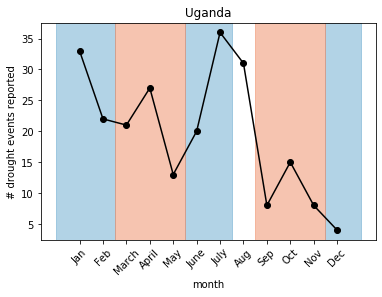

In [5]:
Uganda = df[df['Country']=='Uganda'] 
drought_events = Uganda[Uganda['drought_reported']]
month_of_event = []
for date in pd.to_datetime(drought_events['date']):
    month_of_event.append( date.month )
month_of_event = np.array(month_of_event)
    
# -- Uganda's seasons --- 
dry_season_1 = [12,2]
dry_season_2 = [6,7]
wet_season_1  = [9,11]
wet_season_2  = [3,5]


plt.axvspan(dry_season_1[0]-0.5, 13, ymax=40, color='#67a9cf', alpha=0.5)
plt.axvspan(0,dry_season_1[1]+0.5, ymax=40, color='#67a9cf', alpha=0.5)

plt.axvspan(dry_season_2[0]-0.5, dry_season_2[1]+0.5, ymax=40, color='#67a9cf', alpha=0.5)

plt.axvspan(wet_season_1[0]-0.5, wet_season_1[1]+0.5, ymax=40, color='#ef8a62', alpha=0.5)
plt.axvspan(wet_season_2[0]-0.5, wet_season_2[1]+0.5, ymax=40, color='#ef8a62', alpha=0.5)


# plt.hist(month_of_event, bins=[i-0.5 for i in range(14)], color='black',histtype='step');
counts, bins = np.histogram(month_of_event,bins=[i-0.5 for i in range(1,14)])
plt.plot(range(1,13), counts, marker='o',color='black')
plt.xlabel('month');
plt.xticks(range(1,13), ['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec'],rotation=45)
plt.ylabel('# drought events reported');
plt.title('Uganda');
print('dry seasons shown in blue')
print('wet seasons shown in red')
print('\n \n')





# --- fraction of events within the dry seasons ---- 
events_in_wet_seasons = np.sum( (month_of_event <= wet_season_1[1])&(month_of_event >= wet_season_1[0])  )
events_in_wet_seasons += np.sum( (month_of_event <= wet_season_2[1])&(month_of_event >= wet_season_2[0])  )

events_in_dry_seasons = np.sum(month_of_event) - events_in_wet_seasons
print('drought events reported for Uganda')
print('# events in wet seasons: ', events_in_wet_seasons)
print('# events in dry seasons: ', events_in_dry_seasons)
print((events_in_dry_seasons/(events_in_dry_seasons+events_in_wet_seasons))*100, '% of all reported events occur in the dry seasons (Uganda)')


## Kenya

dry seasons: 
* from June through October
* from December through March 

wet seasons: 
* end of October until December (essentially November) 
* from April through May  

dry seasons shown in blue
wet seasons shown in red

 

drought events reported for Kenya
# events in wet seasons:  28
# events in dry seasons:  545
95.11343804537522 % of all reported events occur in the dry seasons (Uganda)


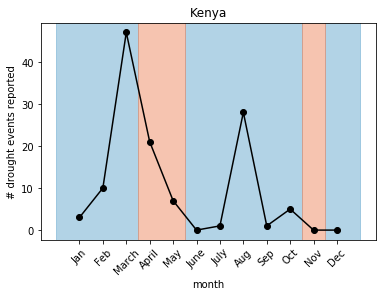

In [6]:
Kenya = df[df['Country']=='Kenya'] 
drought_events = Kenya[Kenya['drought_reported']]
month_of_event = []
for date in pd.to_datetime(drought_events['date']):
    month_of_event.append( date.month )
month_of_event = np.array(month_of_event)
    
# -- Kenya's seasons --- 
dry_season_1 = [12,3]
dry_season_2 = [6,10]
wet_season_1  = [11,11]
wet_season_2  = [4,5]

plt.axvspan(dry_season_1[0]-0.5, 13, ymax=40, color='#67a9cf', alpha=0.5)
plt.axvspan(0,dry_season_1[1]+0.5, ymax=40, color='#67a9cf', alpha=0.5)
plt.axvspan(dry_season_2[0]-0.5, dry_season_2[1]+0.5, ymax=40, color='#67a9cf', alpha=0.5)
plt.axvspan(wet_season_1[0]-0.5, wet_season_1[1]+0.5, ymax=40, color='#ef8a62', alpha=0.5)
plt.axvspan(wet_season_2[0]-0.5, wet_season_2[1]+0.5, ymax=40, color='#ef8a62', alpha=0.5)


# plt.hist(month_of_event, bins=[i-0.5 for i in range(14)], color='black',histtype='step');
counts, bins = np.histogram(month_of_event,bins=[i-0.5 for i in range(1,14)])
plt.plot(range(1,13), counts, marker='o',color='black')
plt.xlabel('month');
plt.xticks(range(1,13), ['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec'],rotation=45)
plt.ylabel('# drought events reported');
plt.title('Kenya');
print('dry seasons shown in blue')
print('wet seasons shown in red')
print('\n \n')






# --- fraction of events within the dry seasons ---- 
events_in_wet_seasons = np.sum( (month_of_event <= wet_season_1[1])&(month_of_event >= wet_season_1[0])  )
events_in_wet_seasons += np.sum( (month_of_event <= wet_season_2[1])&(month_of_event >= wet_season_2[0])  )

events_in_dry_seasons = np.sum(month_of_event) - events_in_wet_seasons
print('drought events reported for Kenya')
print('# events in wet seasons: ', events_in_wet_seasons)
print('# events in dry seasons: ', events_in_dry_seasons)
print((events_in_dry_seasons/(events_in_dry_seasons+events_in_wet_seasons))*100, '% of all reported events occur in the dry seasons (Uganda)')


In conclusion: It certainly makes sense to not normalize based on the time of year, as the seasonal trends seem to actually hold predictive value 

# Use Z-norm to compare different districts and types of data  

In [57]:
from sklearn.preprocessing import StandardScaler
Znorm = StandardScaler()




non_features = ['drought_reported','drought_news_article','drought_desinventar',
                                'date','day','month','year','District','Country',
                                  'SPEI_1month',
                                 'SPEI_2month',
                                 'SPEI_3month',
                                 'SPEI_4month',
                                 'SPEI_5month',
                                 'SPEI_6month',
                                 'SPEI_7month',
                                 'SPEI_8month',
                                 'SPEI_9month',
                                 'SPEI_10month',
                                 'SPEI_11month',
                                 'SPEI_12month']

features = list( df.columns.drop(non_features) )


normed_by_district = pd.DataFrame()

for district in df['District'].unique():
    # -- filter by district --
    group = df[df['District']==district].reset_index()  
    satelite_data = group[features]
# satelite_data.head()
    Znorm.fit(satelite_data)
    normed_satelite_data = pd.DataFrame(Znorm.transform(satelite_data),  columns=features)
    normed_satelite_data[non_features] = group[non_features]
    
    
    normed_by_district = pd.concat([normed_by_district, normed_satelite_data], ignore_index=True)
    
    
    
    
# normed_by_district.head()
normed_by_district.to_csv('datasets/Droughts_satelite_and_events_Znormed.csv', index=False)

In [50]:
len(normed_by_district)

39532

In [51]:
len(df)

39532

In [58]:
df2 = pd.read_csv('datasets/Droughts_satelite_and_events_Znormed.csv')

0        Uganda
1        Uganda
2        Uganda
3        Uganda
4        Uganda
          ...  
39527     Kenya
39528     Kenya
39529     Kenya
39530     Kenya
39531     Kenya
Name: Country, Length: 39532, dtype: object

In [54]:
normed_by_district

,Unnamed: 0,NDVI,EVI,precipitation_per_hour_v1,precipitation_per_hour_v2,surface_temperature_daytime,surface_temperature_nighttime,evapotranspiration,rainfall,SoilMoisture00_10cm,...,SPEI_3month,SPEI_4month,SPEI_5month,SPEI_6month,SPEI_7month,SPEI_8month,SPEI_9month,SPEI_10month,SPEI_11month,SPEI_12month
0,-1.724665,-1.874641,-1.570809,-1.217134,-1.210825,1.914201,1.651377,-1.632338,-1.362386,-1.683524,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.709861,-1.206775,-1.143460,0.554526,0.337322,1.068590,0.768848,0.343810,0.380445,-0.248744,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.695057,0.544968,0.484206,0.726150,0.654021,-0.209722,0.109642,1.241335,1.416795,0.717814,...,0.075238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-1.680253,0.853214,0.948032,0.974735,0.485003,-0.526822,-0.525072,0.585442,1.246105,0.707451,...,0.917779,0.711107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1.665449,1.180418,1.321811,0.368088,-0.002803,-1.099682,-1.324882,0.660043,1.021191,1.218931,...,1.070958,0.836407,0.635385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39527,1.665449,0.220220,-0.162175,0.798413,1.689058,0.581055,1.408841,-0.040959,1.351956,-0.573379,...,-0.723135,-0.952417,-0.333200,-0.816215,-1.044725,-1.194051,-1.171911,-1.118133,-0.794298,0.681074
39528,1.680253,0.147497,0.523223,0.192908,-0.165276,-0.828313,-0.577070,1.597285,0.303809,1.195142,...,-0.657358,-1.034652,-1.215215,-0.732635,-1.035350,-1.215184,-1.318439,-1.310570,-1.297657,-1.035402
39529,1.695057,-0.169813,0.527284,-0.098801,-0.260717,-1.501392,0.228359,-0.130275,-0.283874,0.676217,...,-0.079501,-0.440807,-0.892520,-1.300250,-0.506907,-0.843885,-1.038840,-1.155843,-1.145822,-1.134228
39530,1.709861,0.494846,0.471147,-0.761321,-0.556943,-1.201743,-0.309267,-0.389712,-0.607523,-0.118789,...,-0.212544,-0.075575,-0.475815,-0.987538,-1.480726,-0.533849,-0.863582,-1.084135,-1.204831,-1.197584


In [55]:
normed_satelite_data

,Unnamed: 0,NDVI,EVI,precipitation_per_hour_v1,precipitation_per_hour_v2,surface_temperature_daytime,surface_temperature_nighttime,evapotranspiration,rainfall,SoilMoisture00_10cm,...,SPEI_3month,SPEI_4month,SPEI_5month,SPEI_6month,SPEI_7month,SPEI_8month,SPEI_9month,SPEI_10month,SPEI_11month,SPEI_12month
0,-1.724665,-1.157962,-1.311607,-0.662954,-0.497632,1.894833,1.499454,-1.307162,-0.788811,-1.721017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.709861,-0.237519,-0.604639,0.740603,0.128595,0.376937,-0.488773,0.300002,0.551411,0.056021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.695057,0.203991,0.130456,-0.229351,-0.474107,0.174003,-1.121043,-0.179616,-0.160151,-0.527526,...,-1.495610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-1.680253,-2.268173,-1.843969,-0.752789,-0.577295,-0.376079,-1.847039,-0.767724,-0.749119,-0.622347,...,-1.125978,-1.918542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1.665449,-1.987951,-1.694557,-0.753863,-0.584728,-0.073819,-2.427853,-1.521898,-0.763997,-1.313300,...,-0.384774,-1.055450,-1.952884,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,1.665449,0.220220,-0.162175,0.798413,1.689058,0.581055,1.408841,-0.040959,1.351956,-0.573379,...,-0.723135,-0.952417,-0.333200,-0.816215,-1.044725,-1.194051,-1.171911,-1.118133,-0.794298,0.681074
230,1.680253,0.147497,0.523223,0.192908,-0.165276,-0.828313,-0.577070,1.597285,0.303809,1.195142,...,-0.657358,-1.034652,-1.215215,-0.732635,-1.035350,-1.215184,-1.318439,-1.310570,-1.297657,-1.035402
231,1.695057,-0.169813,0.527284,-0.098801,-0.260717,-1.501392,0.228359,-0.130275,-0.283874,0.676217,...,-0.079501,-0.440807,-0.892520,-1.300250,-0.506907,-0.843885,-1.038840,-1.155843,-1.145822,-1.134228
232,1.709861,0.494846,0.471147,-0.761321,-0.556943,-1.201743,-0.309267,-0.389712,-0.607523,-0.118789,...,-0.212544,-0.075575,-0.475815,-0.987538,-1.480726,-0.533849,-0.863582,-1.084135,-1.204831,-1.197584


/Users/mklein1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Country,District,year,month,day,date,NDVI,EVI,precipitation_per_hour_v1,precipitation_per_hour_v2,...,SPEI_6month,SPEI_7month,SPEI_8month,SPEI_9month,SPEI_10month,SPEI_11month,SPEI_12month,drought_reported,drought_news_article,drought_desinventar
22,Uganda,ABIM,2002,1,1,2002-01-01,0.350700,0.151954,0.014317,6.142172,...,0.179889,0.775433,1.032637,0.897653,0.697753,0.909872,0.804192,True,True,False
41,Uganda,ABIM,2003,8,1,2003-08-01,0.714736,0.459955,0.200323,107.606609,...,0.796114,0.786066,0.822198,0.957503,0.920019,0.911716,0.925954,True,False,True
106,Uganda,ABIM,2009,1,1,2009-01-01,0.310700,0.132644,0.032534,24.326223,...,-0.341339,0.431158,0.339579,-0.005420,-0.971652,-0.881425,-0.892755,True,False,True
111,Uganda,ABIM,2009,6,1,2009-06-01,0.644736,0.387095,0.104592,12.570147,...,-0.953254,-0.873653,-0.663645,-0.745203,-0.843131,-0.983246,-0.320964,True,False,True
133,Uganda,ABIM,2011,4,1,2011-04-01,0.549488,0.303241,0.044594,58.062510,...,-0.398794,-0.532395,-0.471276,-0.720888,-0.527646,-0.867490,-0.743365,True,False,True
137,Uganda,ABIM,2011,8,1,2011-08-01,0.708918,0.441946,0.221184,97.288661,...,0.617007,0.584919,0.510113,0.591574,0.379529,0.305222,0.329286,True,True,False
143,Uganda,ABIM,2012,2,1,2012-02-01,0.301021,0.133163,0.003120,3.359757,...,0.547264,1.066867,1.107546,1.462014,1.149801,0.425929,1.052065,True,True,False
160,Uganda,ABIM,2013,7,1,2013-07-01,0.667149,0.370396,0.272436,114.773169,...,-0.624819,-0.846440,-0.882654,-0.549083,-0.419976,-0.444513,-0.304854,True,True,False
203,Uganda,ABIM,2017,2,1,2017-02-01,0.303016,0.150204,0.060427,25.532248,...,0.315663,-0.820556,-1.207903,-1.444104,-1.749183,-0.653685,-0.944099,True,True,False
227,Uganda,ABIM,2019,2,1,2019-02-01,0.324562,0.159786,0.013876,4.260187,...,-2.032773,-2.109419,-1.928753,-1.618685,-0.330393,0.994406,1.361681,True,True,False


In [6]:
for x in df.columns:
    print(x)

Country
District
year
month
day
date
NDVI
EVI
precipitation_per_hour_v1
precipitation_per_hour_v2
surface_temperature_daytime
surface_temperature_nighttime
evapotranspiration
rainfall
SoilMoisture00_10cm
SoilMoisture10_40cm
SoilMoisture40_100cm
SoilMoisture100_200cm
SoilTemperature00_10cm
SoilTemperature10_40cm
SoilTemperature40_100cm
SoilTemperature100_200cm
air_temperature
wind_speed
SPEI_1month
SPEI_2month
SPEI_3month
SPEI_4month
SPEI_5month
SPEI_6month
SPEI_7month
SPEI_8month
SPEI_9month
SPEI_10month
SPEI_11month
SPEI_12month
drought_reported
drought_news_article
drought_desinventar
